In [21]:
import numpy as np
import pandas as pd
import scipy.optimize as lm
from matplotlib.pyplot import style
style.use('ggplot')
import matplotlib.pyplot as pt

In [34]:
a = lambda t , tau : (1 - np.exp(-t/tau) )/(t/tau)

b = lambda t , tau : (1 - np.exp(-t/tau) )/(t/tau) - np.exp(-t/tau)

def nelson_siegel(p,t):
    p0 , p1 , p2 , tau  =  p
    return ( p0 + p1 * a(t,tau) + p2 * b(t,tau) )

def svensson(p,t):
    p0 , p1 , p2 , p3 , tau1 , tau2 = p
    return ( p0 + p1 * a(t,tau1) + p2 * b(t,tau1) + p3 * b(t,tau2) )

def ns_error(p,t,r_t):
    diff = r_t - nelson_siegel(p,t)
    return np.sum( np.power( diff , 2 ) )

def sv_error(p,t,r_t):
    diff = r_t - svensson(p,t)
    return np.sum( np.power(  diff  , 2 ) )

In [35]:
df = pd.read_excel('data.xlsx')
t , r_t = df.t , df.r_t/100 

In [71]:
ns_p = [0.02,-0.02,0.01,10.0]
pa = lm.least_squares(ns_error,ns_p,args=(t,r_t)).x
pa

array([ 0.03037783, -0.01772277,  0.01719611,  9.99998099])

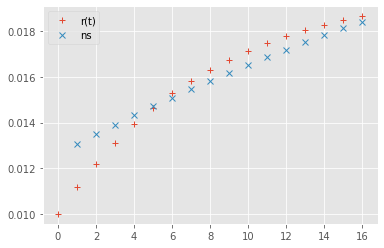

In [74]:
pt.plot(r_t,'+',label = 'r(t)')
pt.plot(nelson_siegel(pa,t),'x',label = 'ns')
pt.legend()

In [76]:
sv_p = [0.02,-0.01,-0.01,0.0,2,2]
pa = lm.least_squares(sv_error,sv_p,args=(t,r_t)).x
pa

array([ 0.02477174, -0.01306467, -0.00576757,  0.00423239,  1.99997626,
        2.00000072])

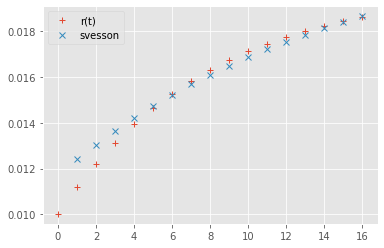

In [77]:
pt.plot(r_t,'+',label = 'r(t)')
pt.plot(svensson(pa,t),'x',label = 'svesson')
pt.legend()

In [ ]:
# 可以知道從r(t)著手 , 是一件很錯誤的開始 .
# 所以用 p(t) 估計 parameters